## Lab 1

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Read the data into datafrome
df = pd.read_csv("train.csv")

# Display the first `n` rows.
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
# Generate descriptive statistics.
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
# Drop specified labels from rows or columns.
df.drop(labels=['Product_Category_2','Product_Category_3'],axis=1,inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
# Count of the number of missing values in each column.
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [7]:
# Printing count of unique values in each columns.
cols = list(df.columns)
delete_cols = ["User_ID", "Product_ID", "Product_Category_1", "Purchase"]

for i in delete_cols:
    cols.remove(i)

for col in cols:
    print(df[col].value_counts())

M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
0    324731
1    225337
Name: Marital_Status, dtype: int64


In [8]:
# Creating dummies.
colm = ['Marital_Status','Gender','City_Category']
dummies = []
for col in colm:
    dummies.append(pd.get_dummies(df[col]))

dummies = pd.concat(dummies,axis=1)
df = pd.concat((df,dummies),axis=1)

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,0,1,F,M,A,B,C
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,1,0,1,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1,0,1,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1,0,1,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1,0,1,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,1,0,0,1,0,0,1


In [9]:
# Renaming the columns
col = df.columns
df.columns = [  'User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status', 'Product_Category_1', 'Purchase', 'Married', 'Not_Married', 'Female', 'Male', 
              'City_Category_A', 'City_Category_B', 'City_Category_C']

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Married,Not_Married,Female,Male,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,1,0,1,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1,0,1,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1,0,1,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1,0,1,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,1,0,0,1,0,0,1


In [10]:
# Dropping redundant columns.
df.drop(['Gender','Marital_Status','City_Category'],axis=1,inplace=True)
df.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Purchase,Married,Not_Married,Female,Male,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0-17,10,2,3,8370,1,0,1,0,1,0,0
1,1000001,P00248942,0-17,10,2,1,15200,1,0,1,0,1,0,0
2,1000001,P00087842,0-17,10,2,12,1422,1,0,1,0,1,0,0
3,1000001,P00085442,0-17,10,2,12,1057,1,0,1,0,1,0,0
4,1000002,P00285442,55+,16,4+,8,7969,1,0,0,1,0,0,1


In [11]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [12]:
# Calculating the Outliers
interQuartileRange = (df['Purchase'].describe()[6] - df['Purchase'].describe()[4])
upper = df['Purchase'].describe()[6] + (1.5 * interQuartileRange)
lower = df['Purchase'].describe()[4] - (1.5 * interQuartileRange)

print("IQR (Q3-Q1): " + str(interQuartileRange))
print("Lower: " + str(lower))
print("Upper: " + str(upper))

outliers = []
for i in range(df['Purchase'].shape[0]):
    if(df['Purchase'].iloc[i]>upper):
        outliers.append([i,df['Purchase'].iloc[i]])
        
print("Total number of outliers: " + str(len(outliers)))

IQR (Q3-Q1): 6231.0
Lower: -3523.5
Upper: 21400.5
Total number of outliers: 2677


In [13]:
# Normalization on Purchase column.
# normal_value = (value - min)/(max - min)
df.Purchase = (df.Purchase - df.Purchase.min()) / (df.Purchase.max() - df.Purchase.min())
df.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Purchase,Married,Not_Married,Female,Male,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0-17,10,2,3,0.348992,1,0,1,0,1,0,0
1,1000001,P00248942,0-17,10,2,1,0.634181,1,0,1,0,1,0,0
2,1000001,P00087842,0-17,10,2,12,0.058875,1,0,1,0,1,0,0
3,1000001,P00085442,0-17,10,2,12,0.043634,1,0,1,0,1,0,0
4,1000002,P00285442,55+,16,4+,8,0.332248,1,0,0,1,0,0,1


In [14]:
df.describe()

,User_ID,Occupation,Product_Category_1,Purchase,Married,Not_Married,Female,Male,City_Category_A,City_Category_B,City_Category_C
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,0.386320,0.590347,0.409653,0.246895,0.753105,0.268549,0.420263,0.311189
std,1.727592e+03,6.522660,3.936211,0.209740,0.491770,0.491770,0.431205,0.431205,0.443205,0.493601,0.462980
min,1.000001e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001516e+06,2.000000,1.000000,0.242641,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.003077e+06,7.000000,5.000000,0.335505,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.004478e+06,14.000000,8.000000,0.502818,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.006040e+06,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df = df.drop(columns='User_ID')

## Lab 2

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
contingency_table = pd.crosstab([df['Married'],df['Not_Married']],df['City_Category_A'],margins=True)
contingency_table

,City_Category_A,0,1,All
Married,Not_Married,,,
0,1,168790,56547,225337
1,0,233558,91173,324731
All,,402348,147720,550068


<BarContainer object of 7 artists>

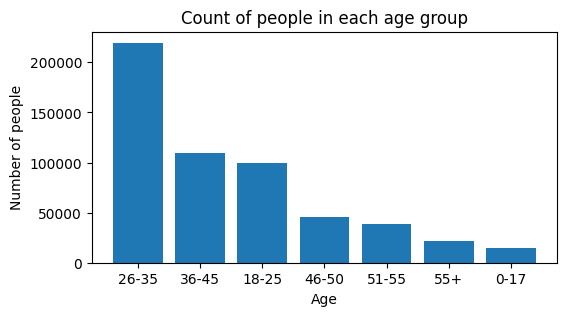

In [18]:
age_count = df.Age.value_counts()
age_group = ['26-35', "36-45","18-25","46-50","51-55","55+","0-17"]

plt.figure(figsize=(6,3))
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Count of people in each age group')
plt.bar(age_group,age_count)

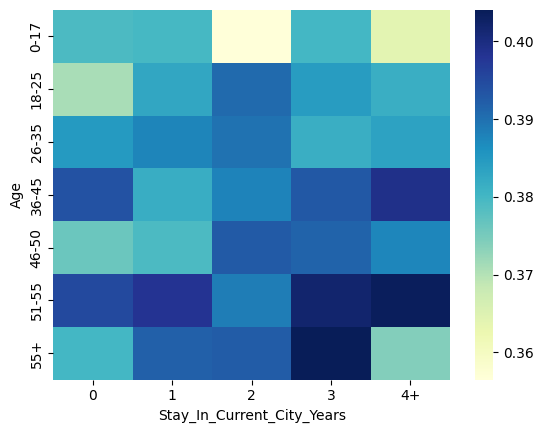

In [19]:
heat = df.pivot_table(index='Age',columns = 'Stay_In_Current_City_Years',values='Purchase')
sns.heatmap(heat,cmap="YlGnBu")
plt.show()

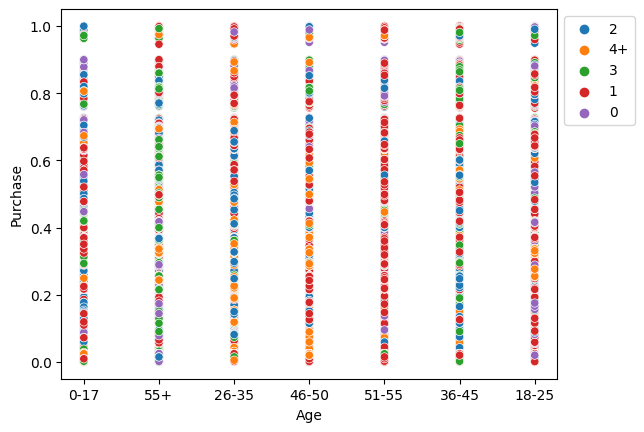

In [20]:
sns.scatterplot(data=df,x='Age',y='Purchase',hue='Stay_In_Current_City_Years')
plt.legend(bbox_to_anchor=(1,1))

(array([ 15102.,  21504.,      0., 219587.,      0.,  45701.,  38501.,
             0., 110013.,  99660.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

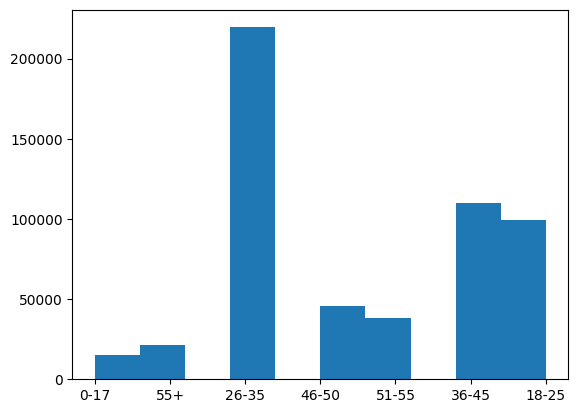

In [21]:
plt.hist(x=df['Age'])

(array([0.04575798, 0.06515558, 0.        , 0.66533289, 0.        ,
        0.13847076, 0.11665527, 0.        , 0.33333152, 0.30196267]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

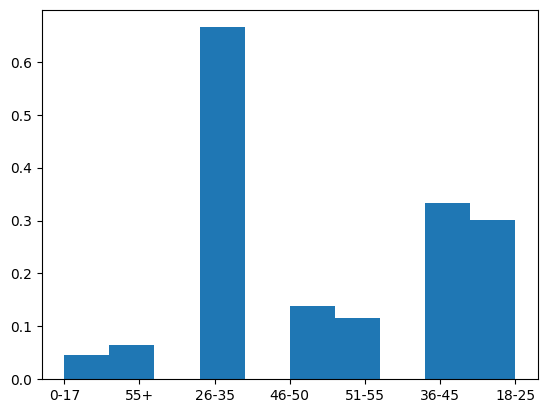

In [22]:
plt.hist(x=df['Age'], density = True)

#### This graph represents the normalized age group. The age group is divided into bins(represented as bars) and each bin has the count of data points that fall in the bin's range. 

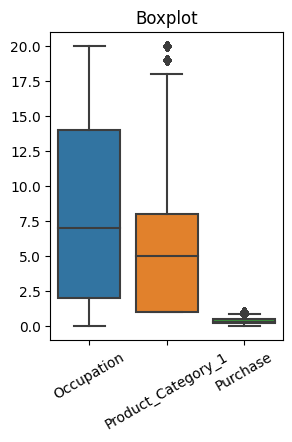

In [23]:
plt.figure(figsize=(3,4))
sns.boxplot(data=df[['Occupation','Product_Category_1','Purchase']])
plt.title("Boxplot")
plt.xticks(rotation=30)
plt.show()

### Lab 3

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df.shape

(550068, 13)

In [31]:
y = df['Purchase']
y.head()

0    0.348992
1    0.634181
2    0.058875
3    0.043634
4    0.332248
Name: Purchase, dtype: float64

In [32]:
x =  df.drop('Purchase',axis=1)
x.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Married,Not_Married,Female,Male,City_Category_A,City_Category_B,City_Category_C
0,P00069042,0-17,10,2,3,1,0,1,0,1,0,0
1,P00248942,0-17,10,2,1,1,0,1,0,1,0,0
2,P00087842,0-17,10,2,12,1,0,1,0,1,0,0
3,P00085442,0-17,10,2,12,1,0,1,0,1,0,0
4,P00285442,55+,16,4+,8,1,0,0,1,0,0,1


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)

Text(0, 0.5, 'Number of Rows')

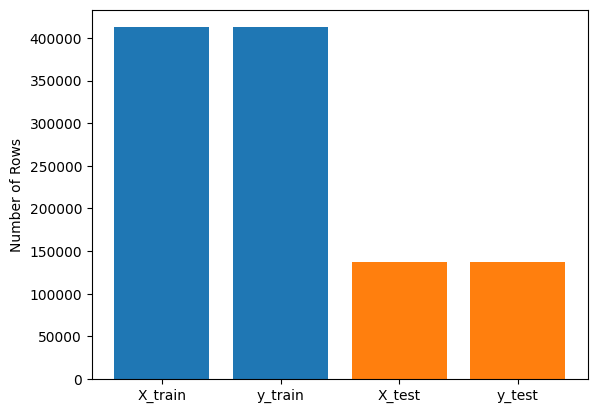

In [53]:
plt.bar(height = [X_train.shape[0],y_train.shape[0],], x=['X_train','y_train'])
plt.bar(height = [X_test.shape[0],y_test.shape[0]], x=['X_test','y_test'])
plt.ylabel('Number of Rows')

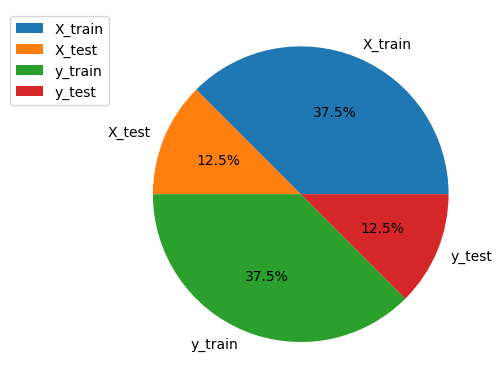

In [74]:
plt.pie([X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0]], labels=['X_train','X_test','y_train','y_test'],
        autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(0,1))
plt.show()

In [37]:
print("X train size: "+str(X_train.shape))
print("X test size: "+str(X_test.shape))
print("y train size: "+str(y_train.shape))
print("y test size: "+str(y_test.shape))

X train size: (412551, 12)
X test size: (137517, 12)
y train size: (412551,)
y test size: (137517,)


In [76]:
from statsmodels.stats.proportion import proportions_ztest

In [83]:
ztest, prob = proportions_ztest(X_test.shape[0], X_train.shape[0], value=0.5)

In [84]:
print(str(ztest)+" "+str(prob))

-227.08781341146425 0.0
